In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load file
df = pd.read_csv('climate_action_data.csv')

print("Initial Shape:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)
print(df.head())
print("\nMissing Values:\n", df.isnull().sum())


Initial Shape: (913, 10)

Column Data Types:
 Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object
  Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1  SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2  SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3  SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4  SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   

  Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(

In [9]:
# Replace all 'error' strings with NaN
df.replace('error', np.nan, inplace=True)

# Attempt to convert all columns to numeric where possible
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        continue  # Skip columns that can't be converted

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Re-check missing values
print("\nMissing Values After Cleaning 'error':\n", df.isnull().sum())



Missing Values After Cleaning 'error':
 Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64


In [10]:
# Drop rows with too many NaNs (less than total columns - 3)
threshold = len(df.columns) - 3
df.dropna(thresh=threshold, inplace=True)

# Fill numeric missing values with column median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print("\nMissing Values After Filling:\n", df.isnull().sum())



Missing Values After Filling:
 Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [11]:
# Summary statistics
print("\nDescriptive Statistics:\n", df.describe())



Descriptive Statistics:
        Soil_Moisture(%)     Soil_pH  Temperature(C)  Humidity(%)  \
count        797.000000  797.000000      797.000000   797.000000   
mean          44.763726    6.248795       26.460602    60.037265   
std           20.524828    1.024776        4.878540    17.470601   
min           10.350000    4.520000       18.000000    30.000000   
25%           26.930000    5.320000       22.300000    45.900000   
50%           45.410000    6.260000       26.600000    59.600000   
75%           62.670000    7.080000       30.600000    75.300000   
max           79.980000    8.000000       35.000000    89.900000   

       Fertilizer_Recommended(kg/ha)  Irrigation_Recommended(mm)  
count                     797.000000                  797.000000  
mean                       87.468005                   17.392221  
std                        34.874392                    7.162517  
min                        30.000000                    5.000000  
25%                       

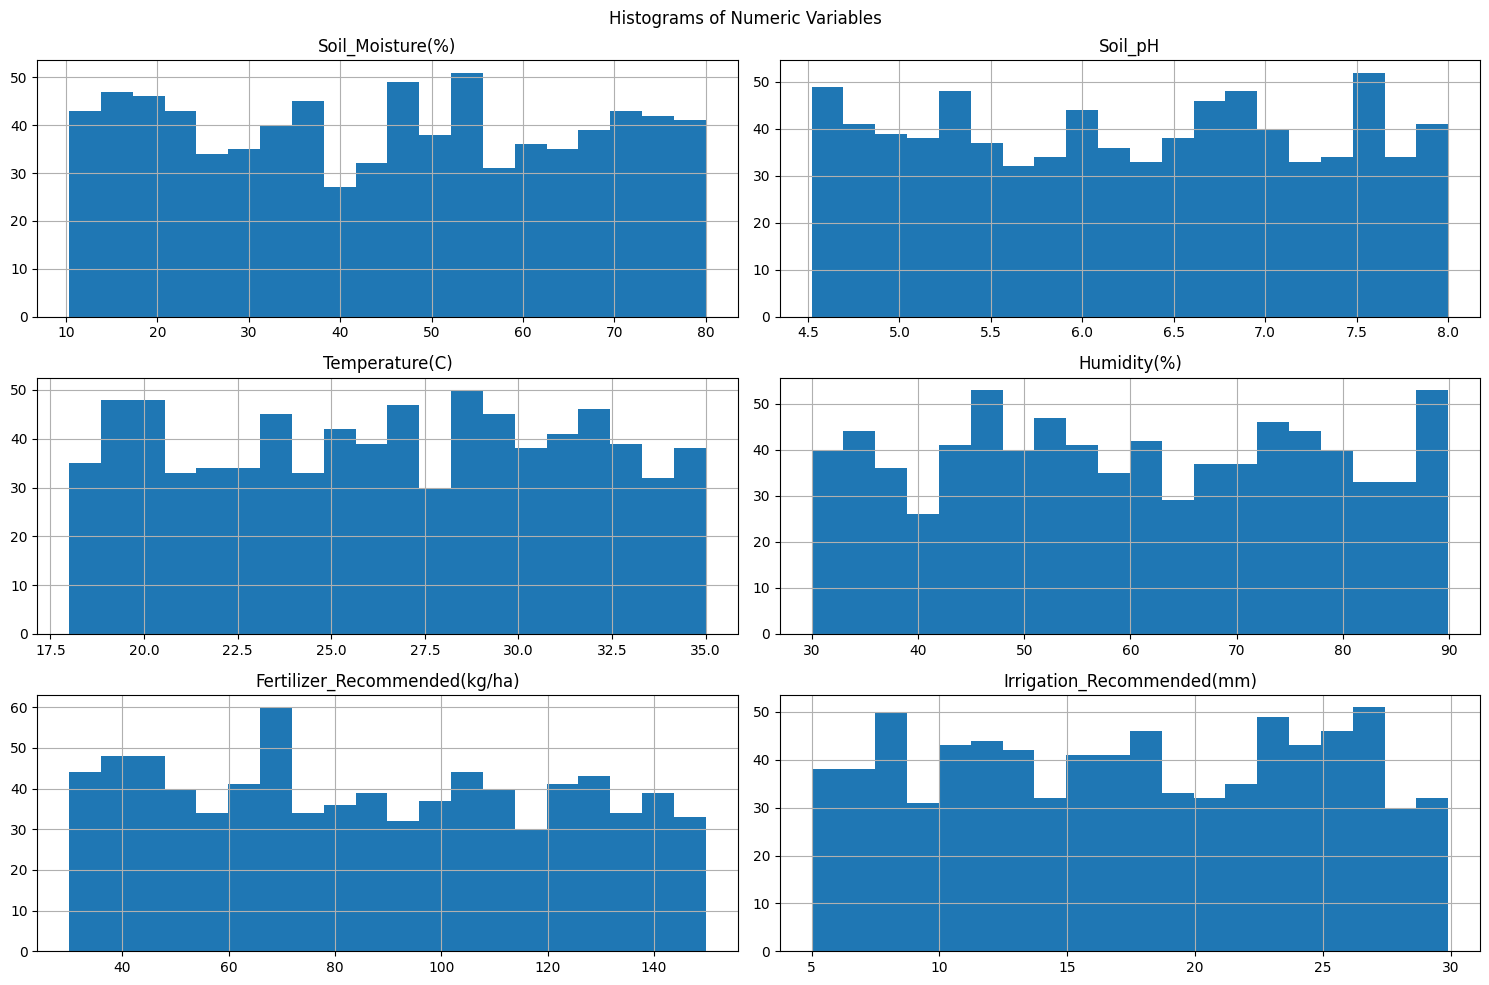

In [12]:
# Plot histograms of numeric columns
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Variables")
plt.tight_layout()
plt.show()


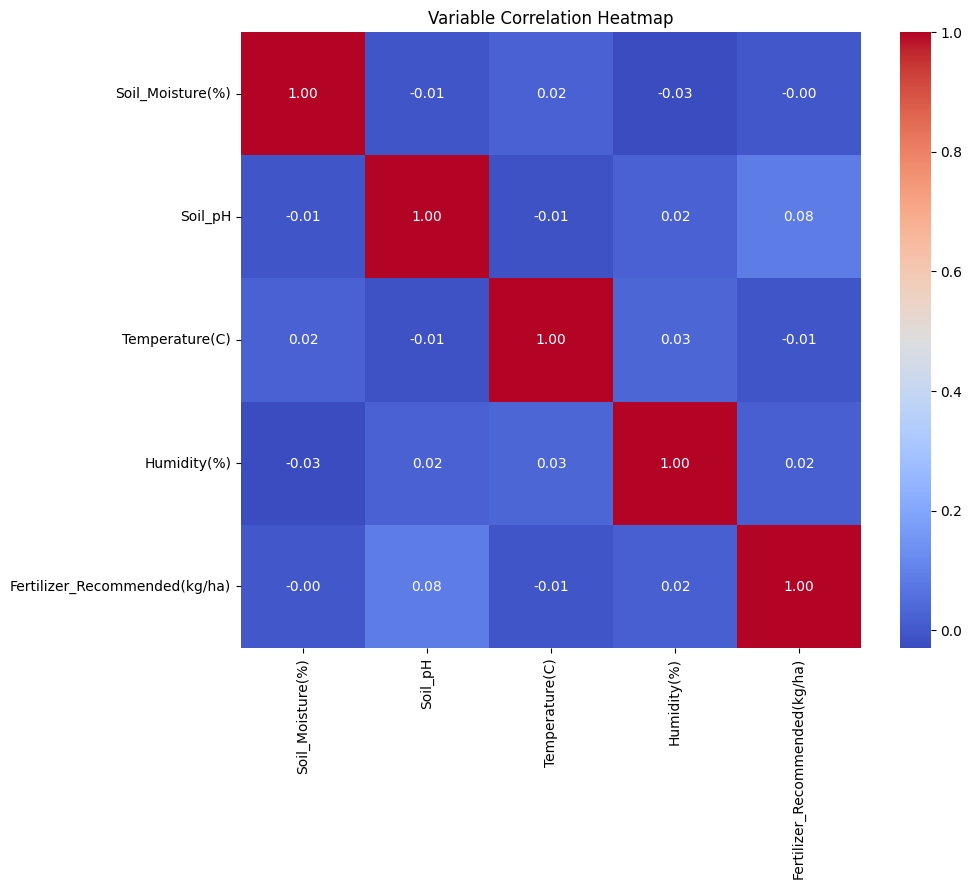

In [21]:
# Correlation heatmap 
plt.figure(figsize=(10, 8))
corr_matrix = df[['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)',
                'Fertilizer_Recommended(kg/ha)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Variable Correlation Heatmap')
plt.show()

In [22]:
#Variables influencing fertilizer recommendations
fertilizer_corr = corr_matrix['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
print("\nFertilizer Correlation:\n", fertilizer_corr)

#Crop with highest average soil moisture
moisture_by_crop = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
print("\nAverage Soil Moisture by Crop:\n", moisture_by_crop.head(1))

#Irrigation adjustments for high-temperature crops
high_temp_crops = df[df['Temperature(C)'] > 30]
irrigation_adjustments = high_temp_crops.groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean().apply(
    lambda x: f"Increase by {max(0, 5 - x):.1f}mm" if x < 5 else "Maintain current"
)
print("\nIrrigation Adjustments for Crops >30°C:\n", irrigation_adjustments)


Fertilizer Correlation:
 Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.083676
Humidity(%)                      0.015300
Soil_Moisture(%)                -0.002757
Temperature(C)                  -0.007206
Name: Fertilizer_Recommended(kg/ha), dtype: float64

Average Soil Moisture by Crop:
 Crop_Type
Wheat    47.195731
Name: Soil_Moisture(%), dtype: float64

Irrigation Adjustments for Crops >30°C:
 Crop_Type
Beans       Maintain current
Lettuce     Maintain current
Maize       Maintain current
Tomatoes    Maintain current
Wheat       Maintain current
Name: Irrigation_Recommended(mm), dtype: object
